In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import dandelion as ddl
import sys
sys.path.append('/home/jovyan/NC_study/scanpy/scripts')
from tools import cmp, exportDEres
sc.logging.print_versions()

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/NC_study/scanpy'))

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [2]:
adata = sc.read_h5ad('out/adata_mnp_v2.h5ad')
adata

AnnData object with n_obs × n_vars = 7514 × 22498
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype', 'leiden_R', 'leiden_R2'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'cohort_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_R2_colors', 'leiden_R_colors', 'leiden_colors', 'main_celltype_colors', 'neighbors', 'patient_colors', 'pca', 'sampleid_colors', 'sampletype_colors', 'temp_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'

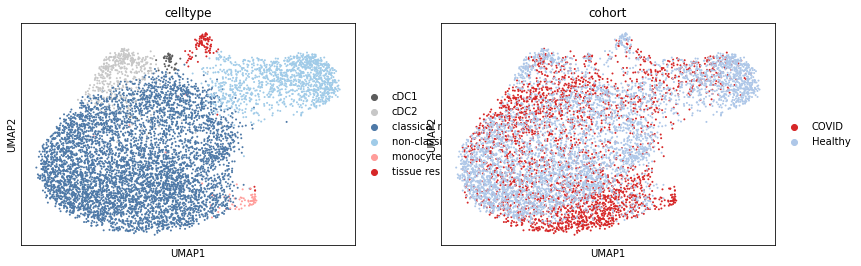

In [3]:
sc.pl.umap(adata, color = ['celltype', 'cohort'])

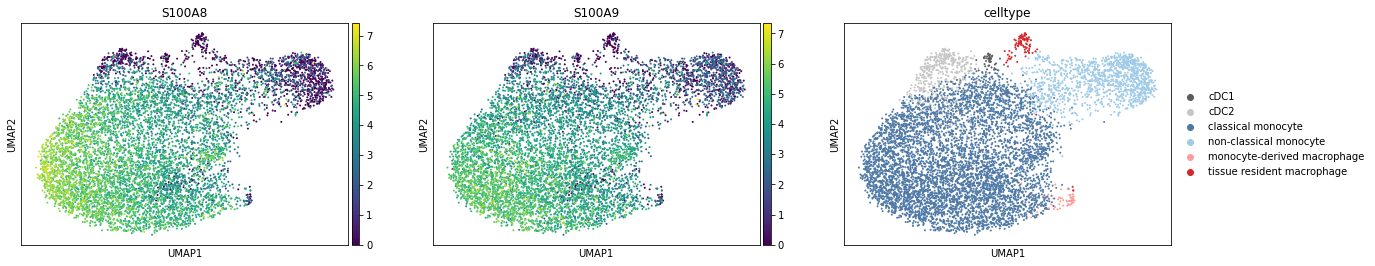

In [7]:
sc.pl.umap(adata, color = ['S100A8', 'S100A9', 'celltype'])

In [8]:
adata.obs['celltype'].value_counts()

classical monocyte             5594
non-classical monocyte         1251
cDC2                            457
tissue resident macrophage       96
monocyte-derived macrophage      67
cDC1                             49
Name: celltype, dtype: int64

In [5]:
adata.uns['cohort_colors']

array(['#d62728', '#aec7e8'], dtype=object)

In [6]:
adata.obs['cohort_celltype'] = [l +'_' +c for l, c in zip(adata.obs['celltype'], adata.obs['cohort'])]
adata.obs['cohort_celltype_patient'] = [a+'_'+b for a,b in zip(adata.obs['cohort_celltype'],adata.obs['patient'])]

In [7]:
new_label = {'Sample_Fq1':'COVID 1',
'Sample_Fq2':'COVID 1',
'Sample_Fq3':'COVID 2',
'Sample_Fq4':'COVID 2',
'Sample_Fq5':'COVID 3',
'Sample_Fq6':'COVID 3',
'Sample_Fq_4':'Healthy',
'Sample_Fq_5':'Healthy',
'Sample_Fq_8':'Healthy',
'Sample_Fq_9':'Healthy',
'Sample_Fq_10':'Healthy',
'Sample_Fq_11':'Healthy',
'Sample_Fq_14':'Healthy',
'Sample_Fq_15':'Healthy',
'Sample_Fq_18':'Healthy',
'Sample_Fq_19':'Healthy',
'Sample_Fq_38':'Healthy'}

In [8]:
adata.obs

,sampleid,patient,sampletype,age_group,gender,cohort,batch,scrublet_score,n_genes,percent_mito,...,bh_pval,is_doublet,filter_rna,leiden,main_celltype,celltype,leiden_R,leiden_R2,cohort_celltype,cohort_celltype_patient
Sample_Fq1_AAACCTGCAACGATCT,Sample_Fq1,1,Blood,Old,M,COVID,0,0.069388,662,0.033716,...,0.948355,False,False,15,myeloid,non-classical monocyte,3,3,non-classical monocyte_COVID,non-classical monocyte_COVID_1
Sample_Fq1_AAACGGGTCCGTACAA,Sample_Fq1,1,Blood,Old,M,COVID,0,0.063719,764,0.024950,...,0.948355,False,False,15,myeloid,non-classical monocyte,3,3,non-classical monocyte_COVID,non-classical monocyte_COVID_1
Sample_Fq1_AAACGGGTCTCAACTT,Sample_Fq1,1,Blood,Old,M,COVID,0,0.031700,396,0.029563,...,0.961612,False,False,5,myeloid,classical monocyte,1,"1,0",classical monocyte_COVID,classical monocyte_COVID_1
Sample_Fq1_AAAGCAATCAATACCG,Sample_Fq1,1,Blood,Old,M,COVID,0,0.078947,555,0.056465,...,0.948355,False,False,15,myeloid,non-classical monocyte,3,3,non-classical monocyte_COVID,non-classical monocyte_COVID_1
Sample_Fq1_AAATGCCCAGTAACGG,Sample_Fq1,1,Blood,Old,M,COVID,0,0.038027,408,0.044715,...,0.961612,False,False,5,myeloid,classical monocyte,0,0,classical monocyte_COVID,classical monocyte_COVID_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_Fq_38_CGAATGTCAGGATCGA,Sample_Fq_38,C26,Nasal,Young,M,Healthy,16,0.093656,826,0.101502,...,0.840003,False,False,15,myeloid,monocyte-derived macrophage,1,"1,4,2",monocyte-derived macrophage_Healthy,monocyte-derived macrophage_Healthy_C26
Sample_Fq_38_CGCCAAGAGGCCCTCA,Sample_Fq_38,C26,Nasal,Young,M,Healthy,16,0.101911,1100,0.040460,...,0.840003,False,False,15,myeloid,classical monocyte,1,"1,4,0",classical monocyte_Healthy,classical monocyte_Healthy_C26
Sample_Fq_38_GCACATATCTTGCCGT,Sample_Fq_38,C26,Nasal,Young,M,Healthy,16,0.067669,548,0.001096,...,0.484972,False,False,15,myeloid,monocyte-derived macrophage,1,"1,4,2",monocyte-derived macrophage_Healthy,monocyte-derived macrophage_Healthy_C26
Sample_Fq_38_TACTTACCACATCCGG,Sample_Fq_38,C26,Nasal,Young,M,Healthy,16,0.104865,494,0.000000,...,0.840003,False,False,15,myeloid,cDC1,2,"2,2",cDC1_Healthy,cDC1_Healthy_C26


... storing 'cohort_celltype' as categorical
... storing 'cohort_celltype_patient' as categorical
... storing 'group' as categorical


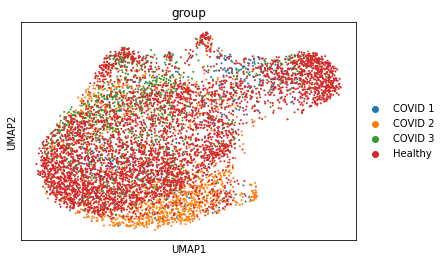

In [9]:
adata.obs['group'] = [new_label[l] for l in adata.obs['sampleid']]
sc.pl.umap(adata, color = 'group')

In [10]:
new_label2 = {'Sample_Fq1':'COVID 1 Blood',
'Sample_Fq2':'COVID 1 Nasal',
'Sample_Fq3':'COVID 2 Blood',
'Sample_Fq4':'COVID 2 Nasal',
'Sample_Fq5':'COVID 3 Nasal',
'Sample_Fq6':'COVID 3 Blood',
'Sample_Fq_4':'Healthy Blood',
'Sample_Fq_5':'Healthy Nasal',
'Sample_Fq_8':'Healthy Blood',
'Sample_Fq_9':'Healthy Nasal',
'Sample_Fq_10':'Healthy Blood',
'Sample_Fq_11':'Healthy Nasal',
'Sample_Fq_14':'Healthy Blood',
'Sample_Fq_15':'Healthy Nasal',
'Sample_Fq_18':'Healthy Blood',
'Sample_Fq_19':'Healthy Nasal',
'Sample_Fq_38':'Healthy Nasal'}

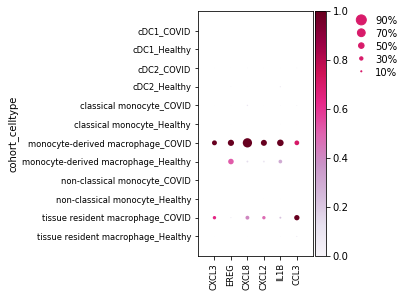

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[2.0999999999999996, 0, 0.2, 0.5, 0.25])

In [11]:
sc.pl.dotplot(adata, ['CXCL3', 'EREG', 'CXCL8', 'CXCL2', 'IL1B', 'CCL3'], 
                     groupby = 'cohort_celltype', 
                     standard_scale = 'var',
                     color_map = 'PuRd')

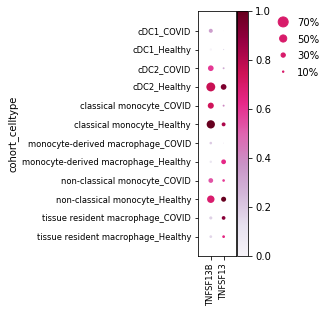

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [12]:
sc.pl.dotplot(adata, ['TNFSF13B', 'TNFSF13'], 
                     groupby = 'cohort_celltype', 
                     standard_scale = 'var',
                     color_map = 'PuRd')

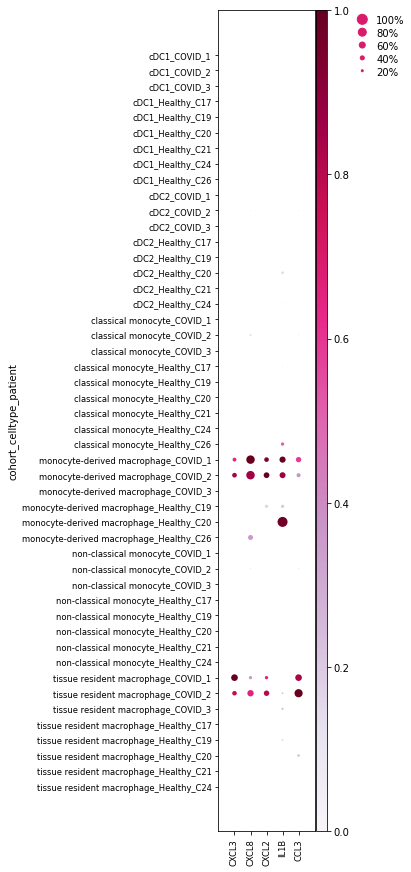

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[1.75, 0, 0.2, 0.5, 0.25])

In [13]:
sc.pl.dotplot(adata, ['CXCL3', 'CXCL8', 'CXCL2', 'IL1B', 'CCL3'], 
                     groupby = 'cohort_celltype_patient', 
                     standard_scale = 'var',
                     color_map = 'PuRd')

### Generating DEG list for MNPs COVID versus Healthy

In [14]:
outpath='out/DEG/MNP/'
if not os.path.exists(outpath):
    os.makedirs(outpath)
for i in list(set(adata.obs['celltype'])):
    adatax = adata[adata.obs['celltype'] == i]
    sc.tl.rank_genes_groups(adatax, groupby = 'cohort', method = 'wilcoxon', n_genes=30000)
    sc.tl.filter_rank_genes_groups(adatax, min_fold_change=[-1,1], max_out_group_fraction=1)
    exportDEres(adatax, 'rank_genes_groups', 'COVID', outpath+str(i)+'_COVID_vs_healthy.txt')
    exportDEres(adatax, 'rank_genes_groups_filtered', 'COVID', outpath+str(i)+'_COVID_vs_healthy_filtered.txt')

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


... storing 'cohort_celltype' as categorical


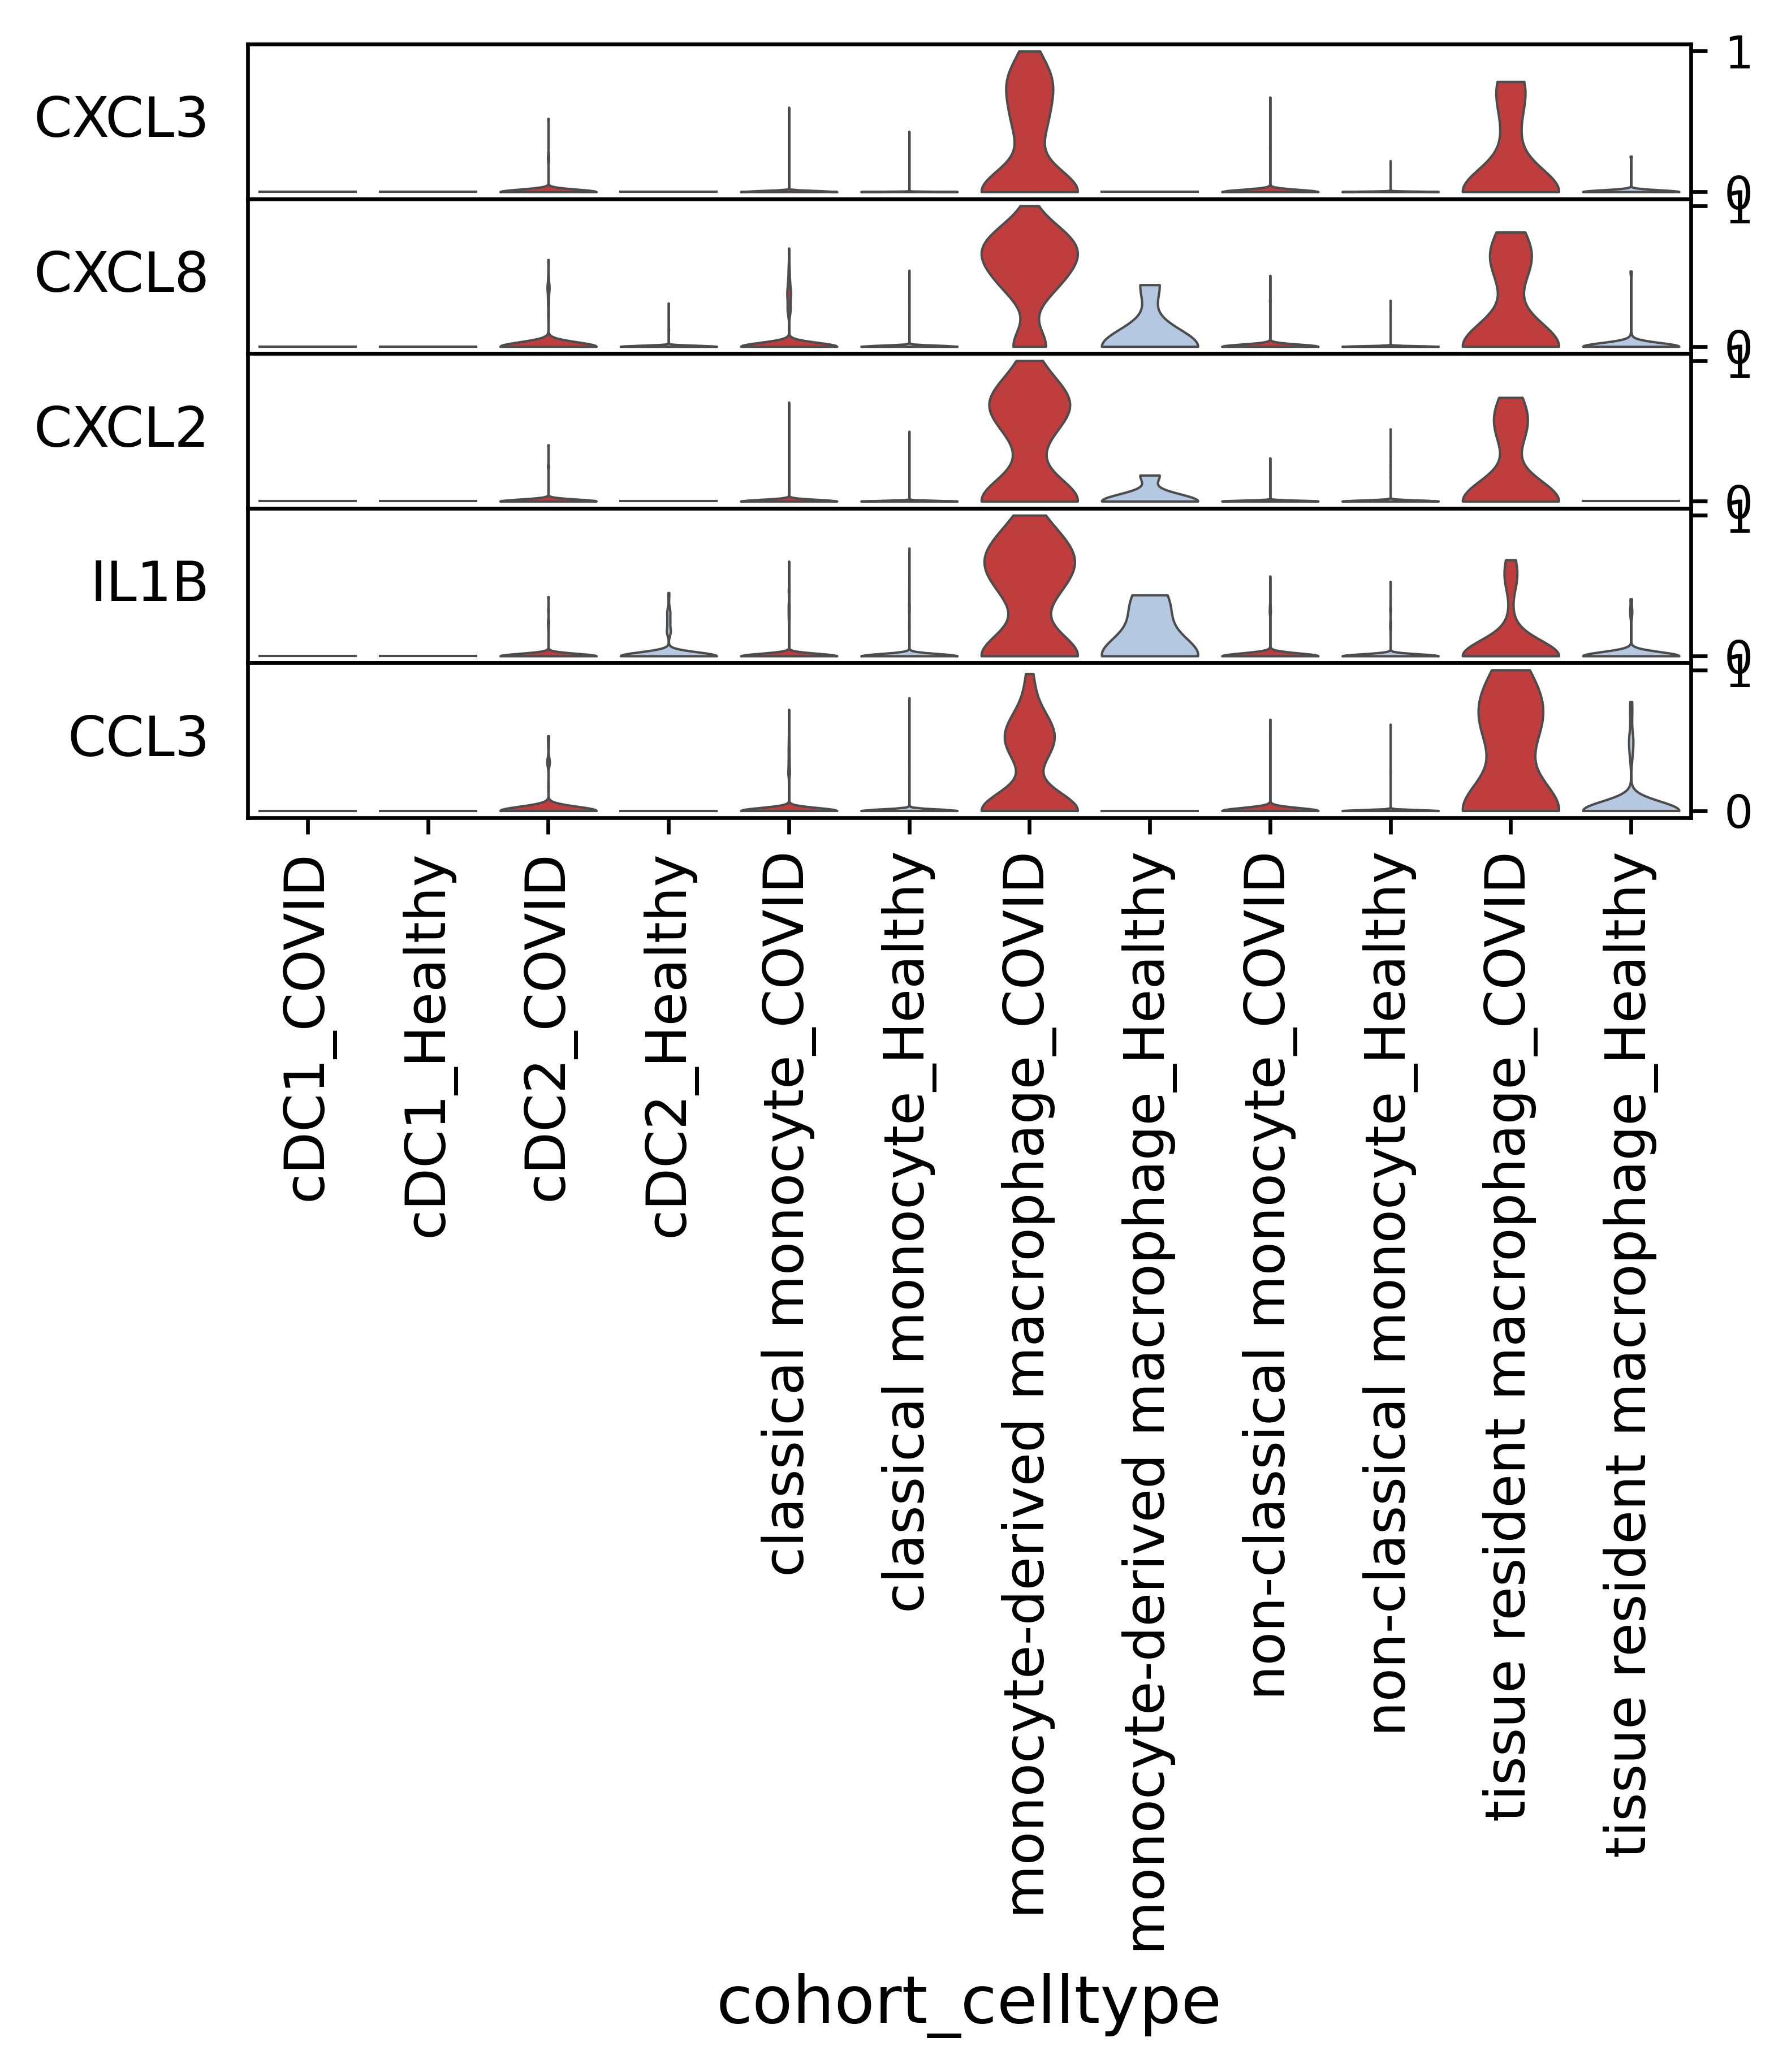

[<AxesSubplot:ylabel='CXCL3'>,
 <AxesSubplot:ylabel='CXCL8'>,
 <AxesSubplot:ylabel='CXCL2'>,
 <AxesSubplot:ylabel='IL1B'>,
 <AxesSubplot:xlabel='cohort_celltype', ylabel='CCL3'>]

In [17]:
sc.set_figure_params(dpi= 300)
adata.obs['cohort_celltype'] = [l +'_' +c for l, c in zip(adata.obs['celltype'], adata.obs['cohort'])]
sc.pl.stacked_violin(adata, ['CXCL3', 'CXCL8', 'CXCL2', 'IL1B', 'CCL3'], 
                     groupby = 'cohort_celltype', 
                     standard_scale = 'var', 
                     palette = adata.uns['cohort_colors'],
                     swap_axes = True,
                     figsize = (6,3))

In [ ]:
sc.pl.umap(adata, color = ['CXCL3', 'EREG', 'CXCL8', 'CXCL2', 'IL1B', 'CCL3'], color_map = cmp(), ncols = 3, size = 50)

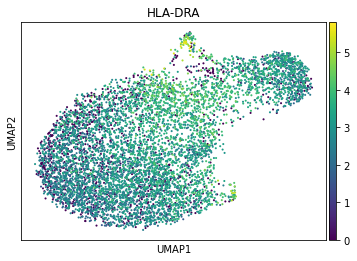

In [11]:
sc.pl.umap(adata[~(adata.obs['celltype'].isin(['cDC1', 'cDC2']))], color = 'HLA-DRA')

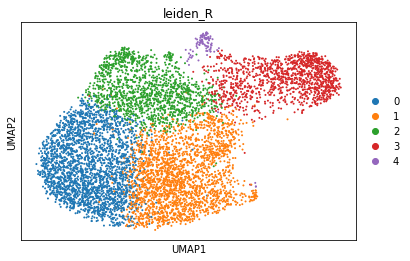

In [12]:
sc.pl.umap(adata, color = 'leiden_R')

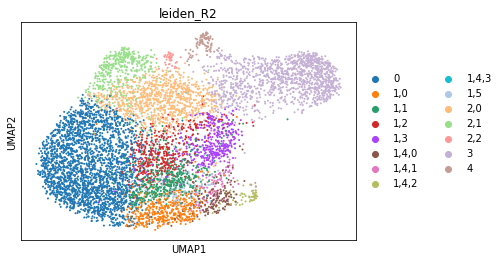

In [13]:
sc.pl.umap(adata, color = 'leiden_R2')

In [14]:
sys.path.append('/home/jovyan/NC_study/scanpy/scripts')
from tools import cmp, exportDEres

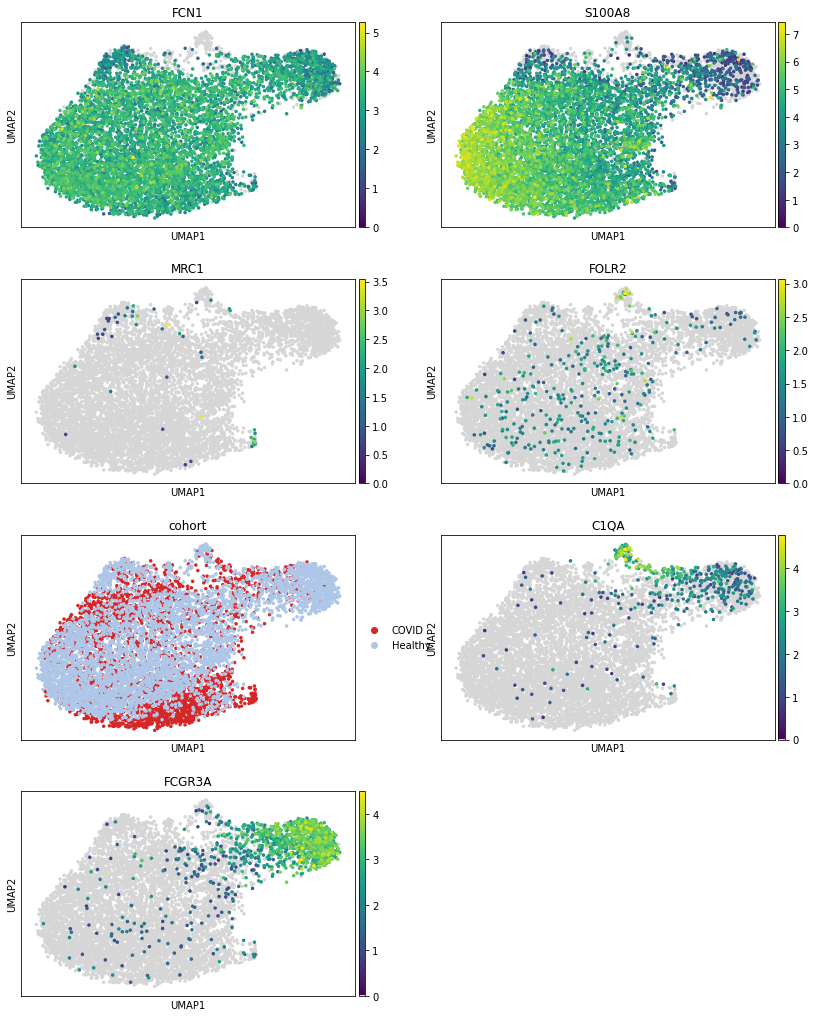

In [22]:
sc.pl.umap(adata, color = ['FCN1','S100A8', 'MRC1', 'FOLR2', 'cohort', 'C1QA', 'FCGR3A'], color_map = cmp(), size = 50, ncols = 2)

In [25]:
adata

AnnData object with n_obs × n_vars = 7514 × 22498
    obs: 'sampleid', 'patient', 'sampletype', 'age_group', 'gender', 'cohort', 'batch', 'scrublet_score', 'n_genes', 'percent_mito', 'n_counts', 'bh_pval', 'is_doublet', 'filter_rna', 'leiden', 'main_celltype', 'celltype', 'leiden_R', 'leiden_R2', 'cohort_celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'cohort_colors', 'gender_colors', 'hvg', 'leiden', 'leiden_R2_colors', 'leiden_R_colors', 'leiden_colors', 'main_celltype_colors', 'neighbors', 'patient_colors', 'pca', 'sampleid_colors', 'sampletype_colors', 'temp_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'